In [2]:
# Dependencies
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import plotly.graph_objects as go
import requests

In [3]:
#Read the CSV
df= pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
#Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.shape

(550, 7)

In [6]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [7]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
df['Genre']


0      Non Fiction
1          Fiction
2      Non Fiction
3          Fiction
4      Non Fiction
          ...     
545        Fiction
546    Non Fiction
547    Non Fiction
548    Non Fiction
549    Non Fiction
Name: Genre, Length: 550, dtype: object

In [9]:
#Check the Genres
genre_count=df['Genre'].value_counts()
genre_count

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [10]:
#Check the percentage
df['Genre'].value_counts(normalize=True) 

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

Here we can see that Non Fiction is a little more represented in the Amazon BestSeller list. 

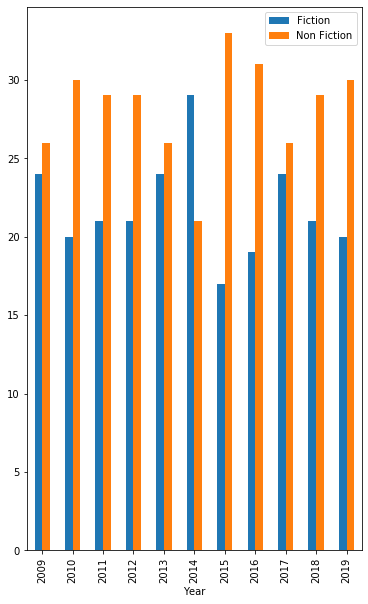

In [11]:
df_genre=df.groupby('Year').Genre.value_counts().unstack()
df_genre.plot(kind='bar', figsize=(6,10))
plt.legend()
plt.show()

The above result shows that for most of the years Non Fiction was a more popular buy. 

##### Book Ratings

In [14]:
data_order =df.groupby(['Name', 'Author', 'Genre'], as_index=False)[['User Rating', 'Reviews']].mean()
data_order =data_order[data_order['Reviews']>3000]
data_order =data_order.sort_values('User Rating', ascending=False)
data_order


,Name,Author,Genre,User Rating,Reviews
177,Obama: An Intimate Portrait,Pete Souza,Non Fiction,4.9,3192.0
71,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,Fiction,4.9,5470.0
118,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,Fiction,4.9,7758.0
119,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,Fiction,4.9,3146.0
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0
...,...,...,...,...,...
20,Allegiant,Veronica Roth,Fiction,3.9,6310.0
251,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,Fiction,3.9,33844.0
88,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,Fiction,3.8,47265.0
101,Go Set a Watchman: A Novel,Harper Lee,Fiction,3.6,14982.0


Books having more than 3000 reviews and having the hightest ratings.

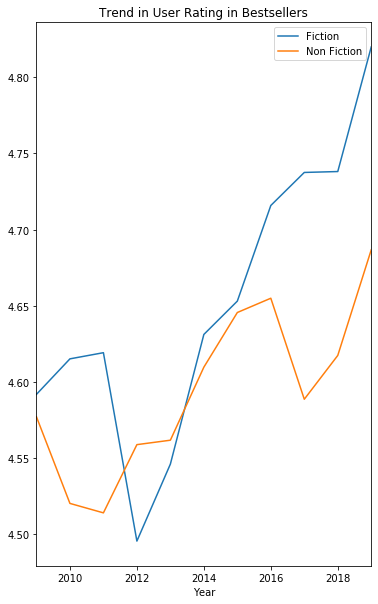

In [18]:
df_rating =df.groupby(['Year','Genre'])['User Rating'].mean().unstack()
df_rating.plot(kind='line', title = 'Trend in User Rating in Bestsellers', figsize=(6,10))
plt.legend()
plt.show()

Fiction books tend to have higher UserRatings.

#####  Book Price

In [11]:
df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean().sort_values('Price', ascending=False).head(10)

,Name,Author,Genre,Price
56,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,Non Fiction,105.0
307,The Twilight Saga Collection,Stephenie Meyer,Fiction,82.0
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,54.0
228,The Book of Basketball: The NBA According to T...,Bill Simmons,Non Fiction,53.0
115,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,Fiction,52.0
191,Publication Manual of the American Psychologic...,American Psychological Association,Non Fiction,46.0
333,Watchmen,Alan Moore,Fiction,42.0
281,The Official SAT Study Guide,The College Board,Non Fiction,40.0
220,The Alchemist,Paulo Coelho,Fiction,39.0
282,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,Non Fiction,36.0


There are 6 non-fiction books out of the top 10 most expensive bestsellers on Amazon. Looking at the rankings, the fiction books in the Top 5 are collections or combinations of a book series, while the non-fiction books are instructional, educational texts. Both genres are priced expensively because of their larger size (relatively large amount of pages).

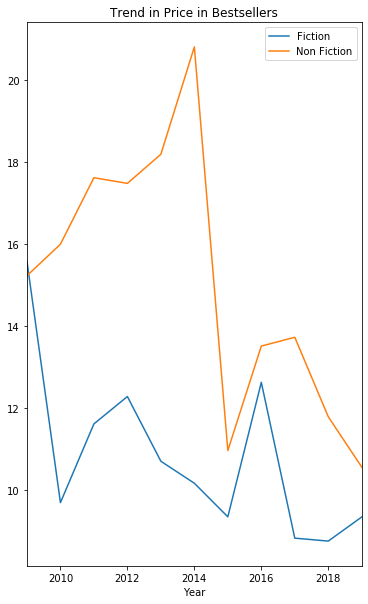

In [19]:
df_price =df.groupby(['Year','Genre'])['Price'].mean().unstack()
df_price.plot(kind='line', title = 'Trend in Price in Bestsellers', figsize=(6,10))
plt.legend()
plt.show()

We can see that Non Fiction books cost more than Fiction ones

##### Number of Reviews

In [13]:
df.groupby(['Name', 'Author', 'Genre'], as_index=False)[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

,Name,Author,Genre,Reviews
342,Where the Crawdads Sing,Delia Owens,Fiction,87841.0
248,The Girl on the Train,Paula Hawkins,Fiction,79446.0
30,Becoming,Michelle Obama,Non Fiction,61133.0
104,Gone Girl,Gillian Flynn,Fiction,57271.0
240,The Fault in Our Stars,John Green,Fiction,50482.0
280,The Nightingale: A Novel,Kristin Hannah,Fiction,49288.0
88,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,Fiction,47265.0
276,The Martian,Andy Weir,Fiction,39459.0
19,All the Light We Cannot See,Anthony Doerr,Fiction,36348.0
220,The Alchemist,Paulo Coelho,Fiction,35799.0


Nine out of ten books on the bestsellers with the most reviews on average are from the fiction genre. As this ranking looks at average reviews, non-fiction books which may not frequently come in series are not disadvantaged, however only Michelle Obama's Becoming had more than 36,000 reviews on average in the non-fiction genre.



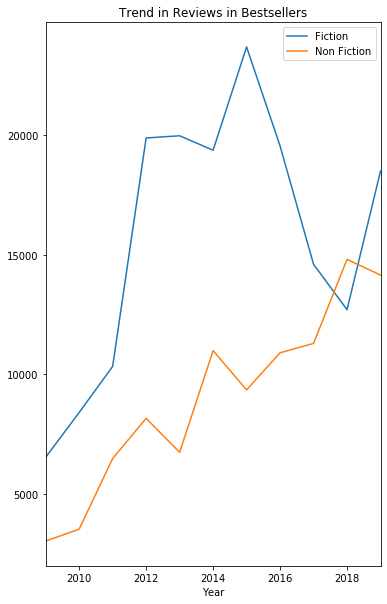

In [20]:
df_reviews =df.groupby(['Year','Genre'])['Reviews'].mean().unstack()
df_reviews.plot(kind='line', title = 'Trend in Reviews in Bestsellers', figsize=(6,10))
plt.legend()
plt.show()

Fiction books tend to have more reviews

##### Finally let's check if any of the authors or books are repeatedly nominated as the best sellers.



In [32]:
# Repeated authors
authors_temp = df['Author'].value_counts(ascending=False)

repeated_authors = authors_temp.drop(labels=authors_temp[authors_temp<7].index)

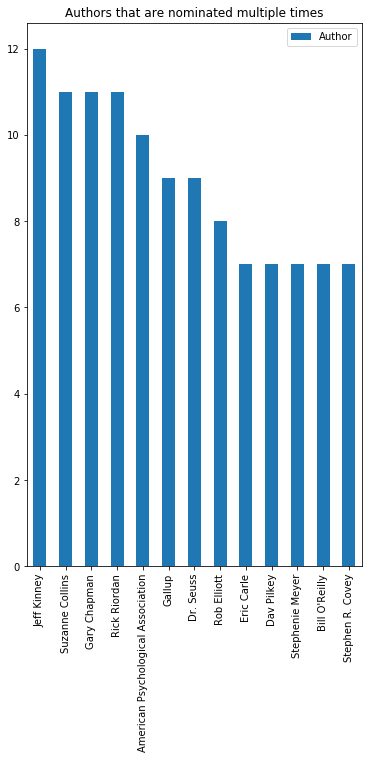

In [35]:
repeated_authors.plot(kind='bar', title='Authors that are nominated multiple times', figsize=(6,10))
plt.legend()
plt.show()


In [42]:
# Repeated book titles
titles_temp = df['Name'].value_counts(ascending=False)
repeated_titles = titles_temp.drop(labels=titles_temp[titles_temp<6].index)
repeated_titles

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Very Hungry Caterpillar                                                           7
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Name: Name, dtype: int64

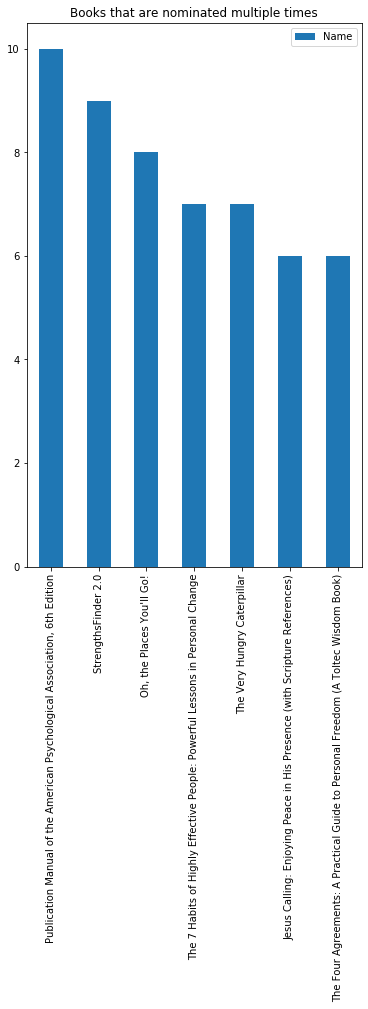

In [43]:
repeated_titles.plot(kind='bar', title='Books that are nominated multiple times', figsize=(6,10))
plt.legend()
plt.show()